In [1]:
import sbi
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# remove top and right axis from plots
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [2]:
# this is necessary to import modules from this repo
import sys
sys.path.append('..')
from src.scripts import evaluate

In [3]:
inference_model = evaluate.InferenceModel()
path = "../savedmodels/sbi/"
model_name = "sbi_linear"
posterior = inference_model.load_model_pkl(path, model_name)

../savedmodels/sbi/


In [4]:
def simulator(thetas):#, percent_errors):
    # convert to numpy array (if tensor):
    thetas = np.atleast_2d(thetas)
    # Check if the input has the correct shape
    if thetas.shape[1] != 2:
        raise ValueError("Input tensor must have shape (n, 2) where n is the number of parameter sets.")

    # Unpack the parameters
    if thetas.shape[0] == 1:
        # If there's only one set of parameters, extract them directly
        m, b = thetas[0, 0], thetas[0, 1]
    else:
        # If there are multiple sets of parameters, extract them for each row
        m, b = thetas[:, 0], thetas[:, 1]
    x = np.linspace(0, 100, 101)
    rs = np.random.RandomState()#2147483648)# 
    # I'm thinking sigma could actually be a function of x
    # if we want to get fancy down the road
    # Generate random noise (epsilon) based on a normal distribution with mean 0 and standard deviation sigma
    sigma = 5
    ε = rs.normal(loc=0, scale=sigma, size=(len(x), thetas.shape[0]))
    
    # Initialize an empty array to store the results for each set of parameters
    y = np.zeros((len(x), thetas.shape[0]))
    for i in range(thetas.shape[0]):
        m, b = thetas[i, 0], thetas[i, 1]
        y[:, i] = m * x + b + ε[:, i]
    return torch.Tensor(y.T)

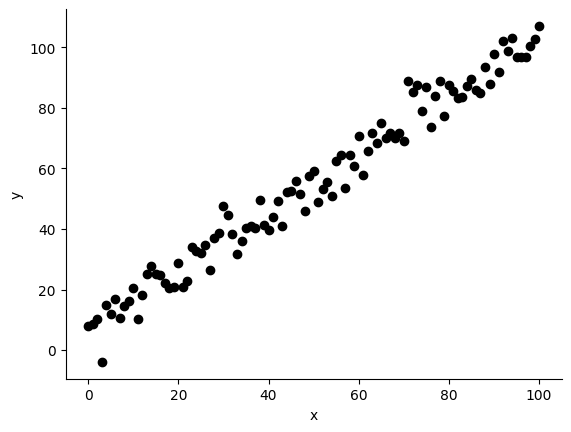

In [5]:
# generate a true dataset
theta_true = [1, 5]
y_true = simulator(theta_true)

# and visualize it
plt.clf()
plt.scatter(np.linspace(0, 100, 101),
            np.array(y_true), color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

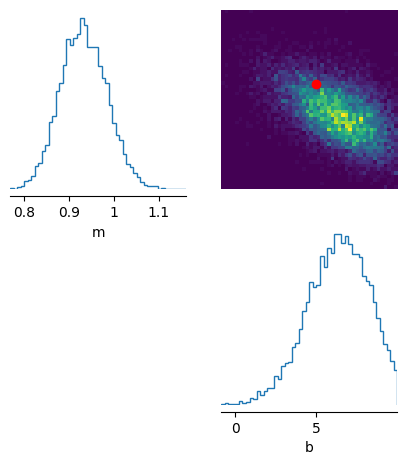

In [6]:
# sample from the posterior
posterior_samples_1 = posterior.sample((10000,), x = y_true)
# that last little part is conditioning on a data value
# plot posterior samples
fig, axes = sbi.analysis.pairplot(
    posterior_samples_1, 
    labels = ['m', 'b'],
    #limits = [[0,10],[-10,10],[0,10]],
    truths = theta_true,
    figsize=(5, 5)
)
axes[0, 1].plot([theta_true[1]], [theta_true[0]], marker="o", color="red")

# Evaluate posterior by running all-in-one helper function
`run_all_sbc`

In [7]:
diagnose_model = evaluate.Diagnose()

In [8]:
num_dim = 2

low_bounds = torch.tensor([0, -10])
high_bounds = torch.tensor([10, 10])

prior = sbi.utils.BoxUniform(low = low_bounds, high = high_bounds)

Running 1000 sbc samples.:   0%|          | 0/1000 [00:00<?, ?it/s]

{'ks_pvals': tensor([5.1542e-06, 1.2161e-08]), 'c2st_ranks': tensor([0.5755, 0.6165]), 'c2st_dap': tensor([0.4810, 0.5045])}


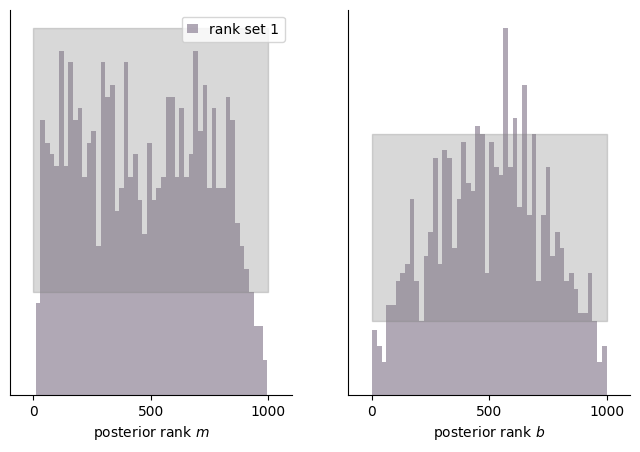

Help on function sbc_rank_plot in module sbi.analysis.plot:

sbc_rank_plot(ranks: Union[torch.Tensor, numpy.ndarray, List[torch.Tensor], List[numpy.ndarray]], num_posterior_samples: int, num_bins: Optional[int] = None, plot_type: str = 'cdf', parameter_labels: Optional[List[str]] = None, ranks_labels: Optional[List[str]] = None, colors: Optional[List[str]] = None, fig: Optional[matplotlib.figure.Figure] = None, ax: Optional[matplotlib.axes._axes.Axes] = None, figsize: Optional[tuple] = None, kwargs: Dict = {}) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes]
    Plot simulation-based calibration ranks as empirical CDFs or histograms.
    
    Additional options can be passed via the kwargs argument, see _sbc_rank_plot.
    
    Args:
        ranks: Tensor of ranks to be plotted shape (num_sbc_runs, num_parameters), or
            list of Tensors when comparing several sets of ranks, e.g., set of ranks
            obtained from different methods.
        num_bins: number o

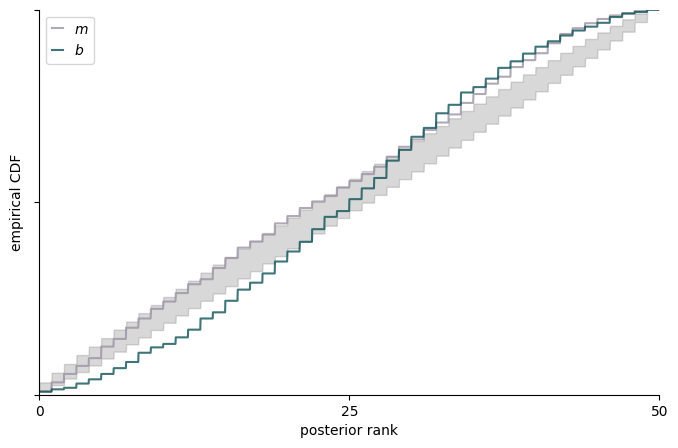

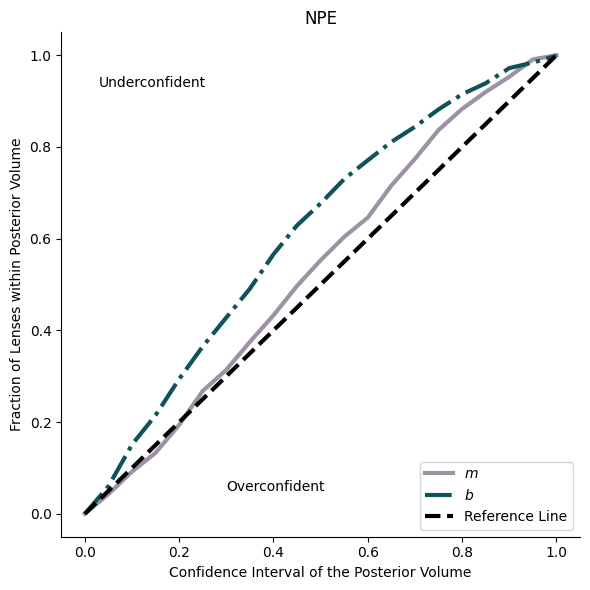

NameError: name 'samples' is not defined

In [9]:
labels_list = ['$m$','$b$']
colorlist = ['#9C92A3','#0F5257']
diagnose_model.run_all_sbc(prior,
                    posterior,
                    simulator,
                    labels_list,
                    colorlist,
                    num_sbc_runs=1_000,
                    num_posterior_samples=1_000,
                    samples_per_inference=1_000,
                    plot=True,
                    save=False,
                    )

# Save to disk

In [ ]:
labels_list = ['$m$','$b$']
colorlist = ['#9C92A3','#0F5257']
diagnose_model.run_all_sbc(prior,
                    posterior,
                    simulator,
                    labels_list,
                    colorlist,
                    num_sbc_runs=1_000,
                    num_posterior_samples=1_000,
                    samples_per_inference=1_000,
                    plot=False,
                    save=True,
                    path='../plots/'
                    )

# Evaluate posterior by running individual pieces
Let's say you just want to get the statistics from the rank plots and print them under the rank plots.


In [ ]:
diagnose_model = evaluate.Diagnose()

In [ ]:
num_sbc_runs = 1_000
num_posterior_samples = 1_000
thetas, ys, ranks, dap_samples = diagnose_model.generate_sbc_samples(prior,
                                                                     posterior,
                                                                     simulator,
                                                                     num_sbc_runs,
                                                                     num_posterior_samples)

diagnose_model.plot_1d_ranks(ranks,
              num_posterior_samples,
              labels_list,
              colorlist,
              plot=True,
              save=False)

In [ ]:
stats = diagnose_model.sbc_statistics(ranks,
                            thetas,
                            dap_samples,
                            num_posterior_samples)
print(stats)